<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: GLOBAL POWER PLANT DATABASE</span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pd.set_option('display.max_columns', None)

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are some columns like 'other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','other_fuel2' have no Value or all are Nan, So we have to drop these columns from DataFrame

In [7]:
df1=df.copy()

In [8]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns_to_drop=['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','other_fuel2' ]
df1=df1.drop(columns_to_drop, axis=1)
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(907, 27)

In [11]:
#After Columns has been Dropped from DataFrame
df1.shape

(907, 21)

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING UNIQUE VALUES</span>


In [12]:
df1['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [13]:
df1['country'].nunique()

1

In [14]:
df1['country_long'].nunique()

1

In [15]:
df1['latitude'].nunique()

836

In [16]:
df1['longitude'].nunique()

827

In [17]:
df1['name'].nunique()

907

In [18]:
df1['primary_fuel'].nunique()

8

In [19]:
df1['capacity_mw'].nunique()

361

In [20]:
df1['other_fuel1'].nunique()

3

In [21]:
df1['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [22]:
df1['other_fuel1'].isna().sum()


709

In [23]:
df1['other_fuel1']

0      NaN
1      NaN
2      NaN
3      NaN
4      Oil
      ... 
902    Oil
903    NaN
904    NaN
905    NaN
906    NaN
Name: other_fuel1, Length: 907, dtype: object

In [24]:
df1['owner'].nunique()

280

In [25]:
df1['geolocation_source'].nunique()

3

In [26]:
df1['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [27]:
df1['year_of_capacity_data'].nunique()

1

In [28]:
df1['generation_gwh_2014'].nunique()

371

In [29]:
df1['generation_gwh_2015'].nunique()

396

In [30]:
df1['generation_gwh_2016'].nunique()

403

In [31]:
df1['generation_gwh_2017'].nunique()

408

In [32]:
df1['generation_gwh_2018'].nunique()

410

In [33]:

df1['generation_data_source'].nunique()

1

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING SKEWNESS</span>


In [34]:
df1.skew()

capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [37]:
df2=df1.copy()

In [38]:
from sklearn.impute import SimpleImputer

numerical_columns = ['latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
categorical_columns = ['other_fuel1', 'owner', 'geolocation_source', 'generation_data_source']

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df2[numerical_columns] = numerical_imputer.fit_transform(df2[numerical_columns])

# Impute categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df2[categorical_columns] = categorical_imputer.fit_transform(df2[categorical_columns])


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

In [40]:
df2.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.399359
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64

In [41]:
df2[numerical_columns]

,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,24.7663,74.6090,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,21.9038,69.3732,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,23.8712,91.3602,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.000000,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,15.2758,75.5811,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,24.3500,73.7477,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [42]:
skewness = df2[numerical_columns].apply(lambda x: x.skew())
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.399359
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64


In [43]:
df1.skew()

capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [44]:
skewness = df2[numerical_columns].apply(lambda x: x.skew())
skewed_columns = skewness[abs(skewness) > 0.5].index  # Adjust the threshold as needed

for col in skewed_columns:
    # Apply a Box-Cox transformation (you can use other transformations as well)
    df2[col] = np.log1p(df2[col])
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.399359
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64


<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Skewness Interpretation</span>

In [45]:
df1.shape

(907, 21)

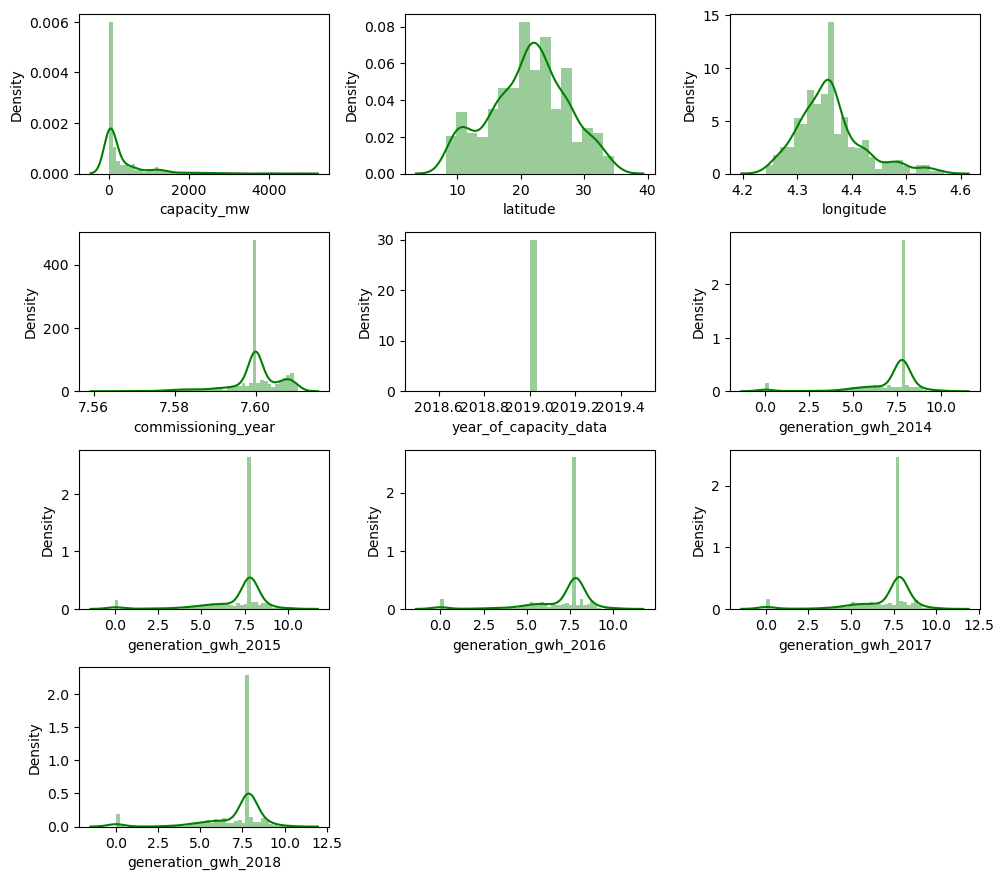

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame
numeric_columns = df2.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 15), facecolor='white')
pltNum = 1

for i in numeric_columns:
    if pltNum < 21:
        plt.subplot(7,3, pltNum)
        sns.distplot(df2[i], color='g')
        plt.xlabel(i)
    pltNum += 1

plt.tight_layout()
plt.show()


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:OUTLIERS BEFORE CORRECTION</span>

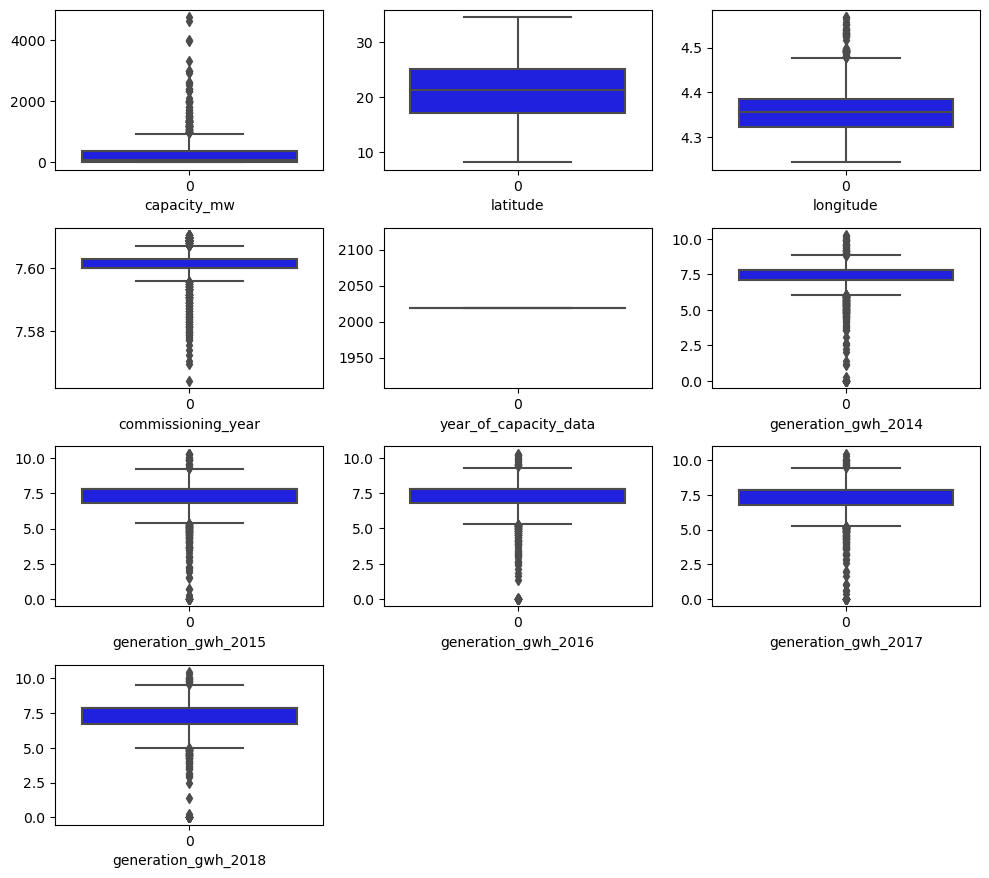

In [47]:
numeric_columns = df2.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 15), facecolor='white')
pltNum = 1

for i in numeric_columns:
    if pltNum < 21:
        plt.subplot(7,3, pltNum)
        sns.boxplot(df2[i], color='b')
        plt.xlabel(i)
    pltNum += 1

plt.tight_layout()
plt.show()


In [49]:
from scipy.stats import zscore

numeric_columns = df2.select_dtypes(include=np.number).columns

# Calculate Z-scores for numeric columns
df2_zscored = df2.copy()
df2_zscored[numeric_columns] = df2[numeric_columns].apply(zscore)

# Display the DataFrame with Z-scores
print("DataFrame with Z-scores:")
print(df2_zscored)


DataFrame with Z-scores:
    country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      -0.548908  1.149805  -0.899131        Solar         Oil   
1 

In [50]:
outliers=(np.abs(df2_zscored[numeric_columns] )>3).all(axis=1)
df3=df2_zscored[numeric_columns][~outliers]
df3

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.899131,1.063775,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
1,-0.386977,0.587311,-0.592393,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
2,-0.486679,0.116179,-1.797707,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
3,-0.324240,0.439989,2.768797,0.530965,NaN,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368
4,2.498942,0.125479,1.056654,1.367406,NaN,0.498441,0.887538,0.906958,0.797561,0.933825
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,0.007174,1.443220,NaN,0.371659,-3.513684,-0.877211,-0.171238,-0.277288
903,-0.548060,-1.366853,0.179610,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
904,-0.509909,-0.974707,-0.377826,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
905,-0.417498,0.518793,-0.784820,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758


In [67]:
df2.shape

(907, 21)

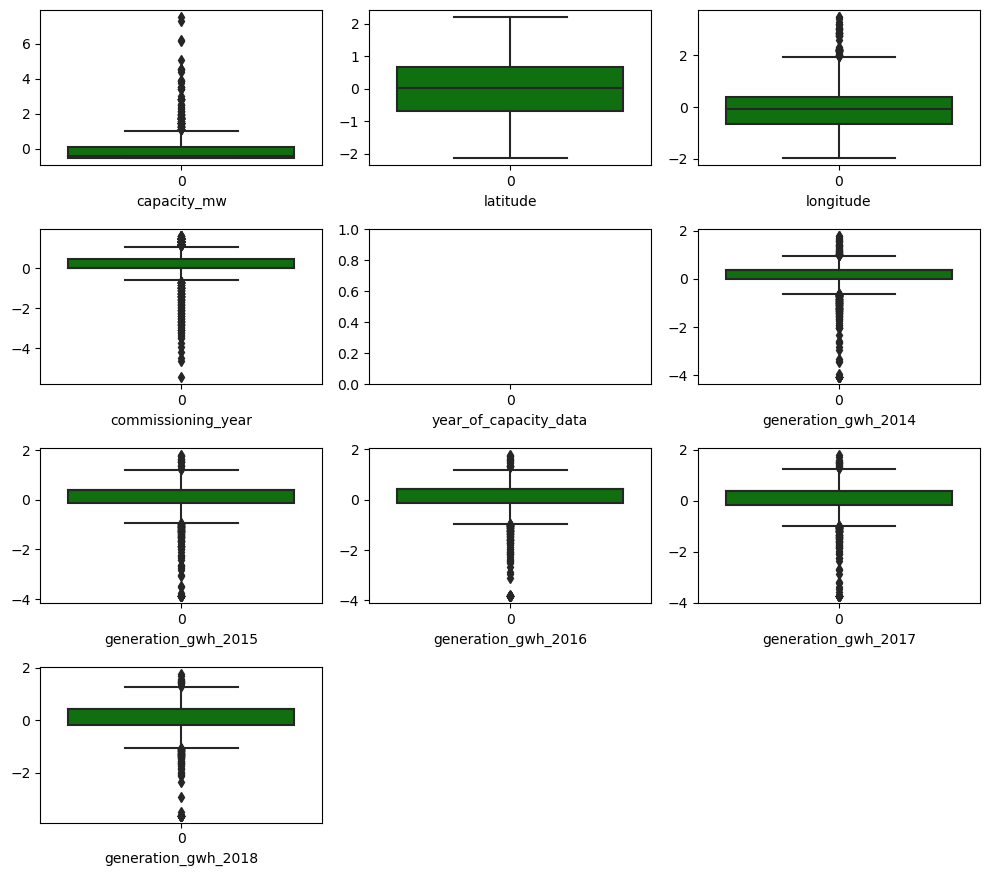

In [51]:
# Assuming df3 is new dataframe with free from Outlier 
#numeric_columns = df3.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 15), facecolor='white')
pltNum = 1

for i in df3.columns:
    if pltNum < 21:
        plt.subplot(7,3, pltNum)
        sns.boxplot(df3[i], color='g')
        plt.xlabel(i)
    pltNum += 1

plt.tight_layout()
plt.show()


In [65]:
df3.shape

(907, 10)

In [66]:
df3

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.899131,1.063775,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
1,-0.386977,0.587311,-0.592393,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
2,-0.486679,0.116179,-1.797707,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
3,-0.324240,0.439989,2.768797,0.530965,NaN,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368
4,2.498942,0.125479,1.056654,1.367406,NaN,0.498441,0.887538,0.906958,0.797561,0.933825
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,0.007174,1.443220,NaN,0.371659,-3.513684,-0.877211,-0.171238,-0.277288
903,-0.548060,-1.366853,0.179610,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
904,-0.509909,-0.974707,-0.377826,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758
905,-0.417498,0.518793,-0.784820,0.003260,NaN,0.371659,0.397424,0.402492,0.400829,0.405758


In [53]:
df2.shape

(907, 21)

In [54]:
df4=df2.copy()

In [55]:
df4.shape

(907, 21)

<span style="color:blue;font-size: 32px;font-family: verdana;font-weight: bold ">LABEL ENCODING<span>

In [56]:
column_to_encode = ['country', 'country_long','name','gppd_idnr','primary_fuel','other_fuel1','owner','source','url','geolocation_source','generation_data_source']
le = LabelEncoder()

for k in column_to_encode:
    df4[k] = le.fit_transform(df4[k])

# Now, df1 contains the encoded values for the specified columns
df4

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,4.307313,6,2,7.606885,229,109,128,1,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
1,0,0,1,519,98.0,24.7663,4.325575,1,2,7.599948,258,174,173,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
2,0,0,2,853,39.2,21.9038,4.253813,7,2,7.599948,2,21,205,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
3,0,0,3,0,135.0,23.8712,4.525696,2,2,7.603399,5,22,58,2,2019.0,6.427765,6.739037,6.787850,6.499448,6.441328,0
4,0,0,4,1,1800.0,21.9603,4.423757,1,2,7.608871,5,22,58,2,2019.0,8.018477,8.685647,8.739376,8.591666,8.892886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,4.361273,1,2,7.609367,5,22,58,2,2019.0,7.796808,0.690581,5.457868,6.764347,6.533062,0
903,0,0,903,822,3.0,12.8932,4.371539,6,2,7.599948,114,77,22,0,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
904,0,0,904,891,25.5,15.2758,4.338350,7,2,7.599948,5,21,260,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
905,0,0,905,539,80.0,24.3500,4.314118,1,2,7.599948,91,59,82,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0


In [57]:
df4=df4.drop('country', axis=1)
df4

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,657,2.5,28.1839,4.307313,6,2,7.606885,229,109,128,1,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
1,0,1,519,98.0,24.7663,4.325575,1,2,7.599948,258,174,173,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
2,0,2,853,39.2,21.9038,4.253813,7,2,7.599948,2,21,205,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
3,0,3,0,135.0,23.8712,4.525696,2,2,7.603399,5,22,58,2,2019.0,6.427765,6.739037,6.787850,6.499448,6.441328,0
4,0,4,1,1800.0,21.9603,4.423757,1,2,7.608871,5,22,58,2,2019.0,8.018477,8.685647,8.739376,8.591666,8.892886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,902,491,1600.0,16.2949,4.361273,1,2,7.609367,5,22,58,2,2019.0,7.796808,0.690581,5.457868,6.764347,6.533062,0
903,0,903,822,3.0,12.8932,4.371539,6,2,7.599948,114,77,22,0,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
904,0,904,891,25.5,15.2758,4.338350,7,2,7.599948,5,21,260,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0
905,0,905,539,80.0,24.3500,4.314118,1,2,7.599948,91,59,82,2,2019.0,7.796808,7.795328,7.811543,7.843362,7.863960,0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">OUTLIERS  REMOVAL</span>

In [59]:
z_score=df4.apply(zscore)
z_score

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,NaN,-1.730142,0.779137,-0.548908,1.149805,-0.899131,1.225688,0.054303,1.063775,2.095328,1.460215,0.476673,-1.083349,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
1,NaN,-1.726323,0.252074,-0.386977,0.587311,-0.592393,-0.967877,0.054303,0.003260,2.446913,2.917019,1.116401,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
2,NaN,-1.722504,1.527719,-0.486679,0.116179,-1.797707,1.664401,0.054303,0.003260,-0.656734,-0.512075,1.571318,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
3,NaN,-1.718684,-1.730142,-0.324240,0.439989,2.768797,-0.529164,0.054303,0.530965,-0.620363,-0.489662,-0.518459,0.394241,NaN,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368,NaN
4,NaN,-1.714865,-1.726323,2.498942,0.125479,1.056654,-0.967877,0.054303,1.367406,-0.620363,-0.489662,-0.518459,0.394241,NaN,0.498441,0.887538,0.906958,0.797561,0.933825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,1.714865,0.145133,2.159821,-0.806975,0.007174,-0.967877,0.054303,1.443220,-0.620363,-0.489662,-0.518459,0.394241,NaN,0.371659,-3.513684,-0.877211,-0.171238,-0.277288,NaN
903,NaN,1.718684,1.409321,-0.548060,-1.366853,0.179610,1.225688,0.054303,0.003260,0.701112,0.743019,-1.030242,-2.560940,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
904,NaN,1.722504,1.672853,-0.509909,-0.974707,-0.377826,1.664401,0.054303,0.003260,-0.620363,-0.512075,2.353208,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
905,NaN,1.726323,0.328460,-0.417498,0.518793,-0.784820,-0.967877,0.054303,0.003260,0.422268,0.339596,-0.177271,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN


In [60]:
outliers=(np.abs(z_score )>3).all(axis=1)
df5=z_score[~outliers]
df5

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,NaN,-1.730142,0.779137,-0.548908,1.149805,-0.899131,1.225688,0.054303,1.063775,2.095328,1.460215,0.476673,-1.083349,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
1,NaN,-1.726323,0.252074,-0.386977,0.587311,-0.592393,-0.967877,0.054303,0.003260,2.446913,2.917019,1.116401,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
2,NaN,-1.722504,1.527719,-0.486679,0.116179,-1.797707,1.664401,0.054303,0.003260,-0.656734,-0.512075,1.571318,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
3,NaN,-1.718684,-1.730142,-0.324240,0.439989,2.768797,-0.529164,0.054303,0.530965,-0.620363,-0.489662,-0.518459,0.394241,NaN,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368,NaN
4,NaN,-1.714865,-1.726323,2.498942,0.125479,1.056654,-0.967877,0.054303,1.367406,-0.620363,-0.489662,-0.518459,0.394241,NaN,0.498441,0.887538,0.906958,0.797561,0.933825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,1.714865,0.145133,2.159821,-0.806975,0.007174,-0.967877,0.054303,1.443220,-0.620363,-0.489662,-0.518459,0.394241,NaN,0.371659,-3.513684,-0.877211,-0.171238,-0.277288,NaN
903,NaN,1.718684,1.409321,-0.548060,-1.366853,0.179610,1.225688,0.054303,0.003260,0.701112,0.743019,-1.030242,-2.560940,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
904,NaN,1.722504,1.672853,-0.509909,-0.974707,-0.377826,1.664401,0.054303,0.003260,-0.620363,-0.512075,2.353208,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN
905,NaN,1.726323,0.328460,-0.417498,0.518793,-0.784820,-0.967877,0.054303,0.003260,0.422268,0.339596,-0.177271,0.394241,NaN,0.371659,0.397424,0.402492,0.400829,0.405758,NaN


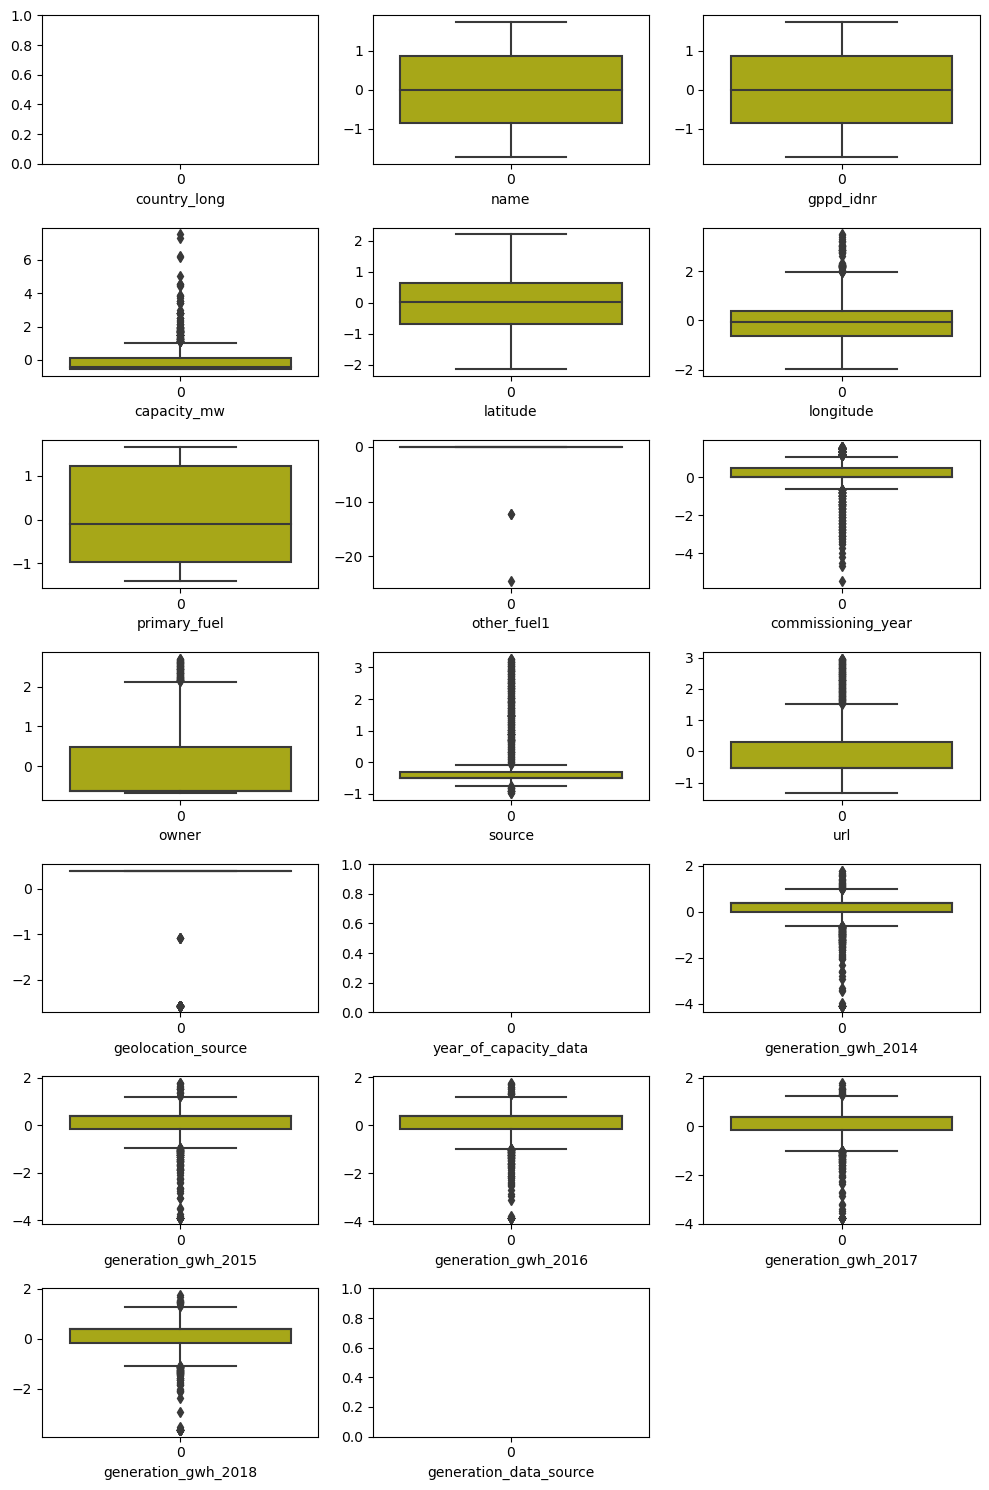

In [61]:
plt.figure(figsize=(10, 15), facecolor='white')
pltNum = 1

for i in df5.columns:
    if pltNum < 21:
        plt.subplot(7,3, pltNum)
        sns.boxplot(df5[i], color='y')
        plt.xlabel(i)
    pltNum += 1

plt.tight_layout()
plt.show()


In [62]:
df6=df5.copy()

In [63]:
df6.shape

(907, 20)

In [80]:
columns_to_drop=['country_long','year_of_capacity_data','generation_data_source']
df5=df5.drop(columns_to_drop, axis=1)
df5

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.730142,0.779137,-0.548908,1.149805,-0.899131,1.225688,0.054303,1.063775,2.095328,1.460215,0.476673,-1.083349,0.371659,0.397424,0.402492,0.400829,0.405758
1,-1.726323,0.252074,-0.386977,0.587311,-0.592393,-0.967877,0.054303,0.003260,2.446913,2.917019,1.116401,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
2,-1.722504,1.527719,-0.486679,0.116179,-1.797707,1.664401,0.054303,0.003260,-0.656734,-0.512075,1.571318,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
3,-1.718684,-1.730142,-0.324240,0.439989,2.768797,-0.529164,0.054303,0.530965,-0.620363,-0.489662,-0.518459,0.394241,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368
4,-1.714865,-1.726323,2.498942,0.125479,1.056654,-0.967877,0.054303,1.367406,-0.620363,-0.489662,-0.518459,0.394241,0.498441,0.887538,0.906958,0.797561,0.933825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.714865,0.145133,2.159821,-0.806975,0.007174,-0.967877,0.054303,1.443220,-0.620363,-0.489662,-0.518459,0.394241,0.371659,-3.513684,-0.877211,-0.171238,-0.277288
903,1.718684,1.409321,-0.548060,-1.366853,0.179610,1.225688,0.054303,0.003260,0.701112,0.743019,-1.030242,-2.560940,0.371659,0.397424,0.402492,0.400829,0.405758
904,1.722504,1.672853,-0.509909,-0.974707,-0.377826,1.664401,0.054303,0.003260,-0.620363,-0.512075,2.353208,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
905,1.726323,0.328460,-0.417498,0.518793,-0.784820,-0.967877,0.054303,0.003260,0.422268,0.339596,-0.177271,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758


In [81]:
df5.shape

(907, 17)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CORRELATION BETWEEN VARIABLES OF DATASET</span>

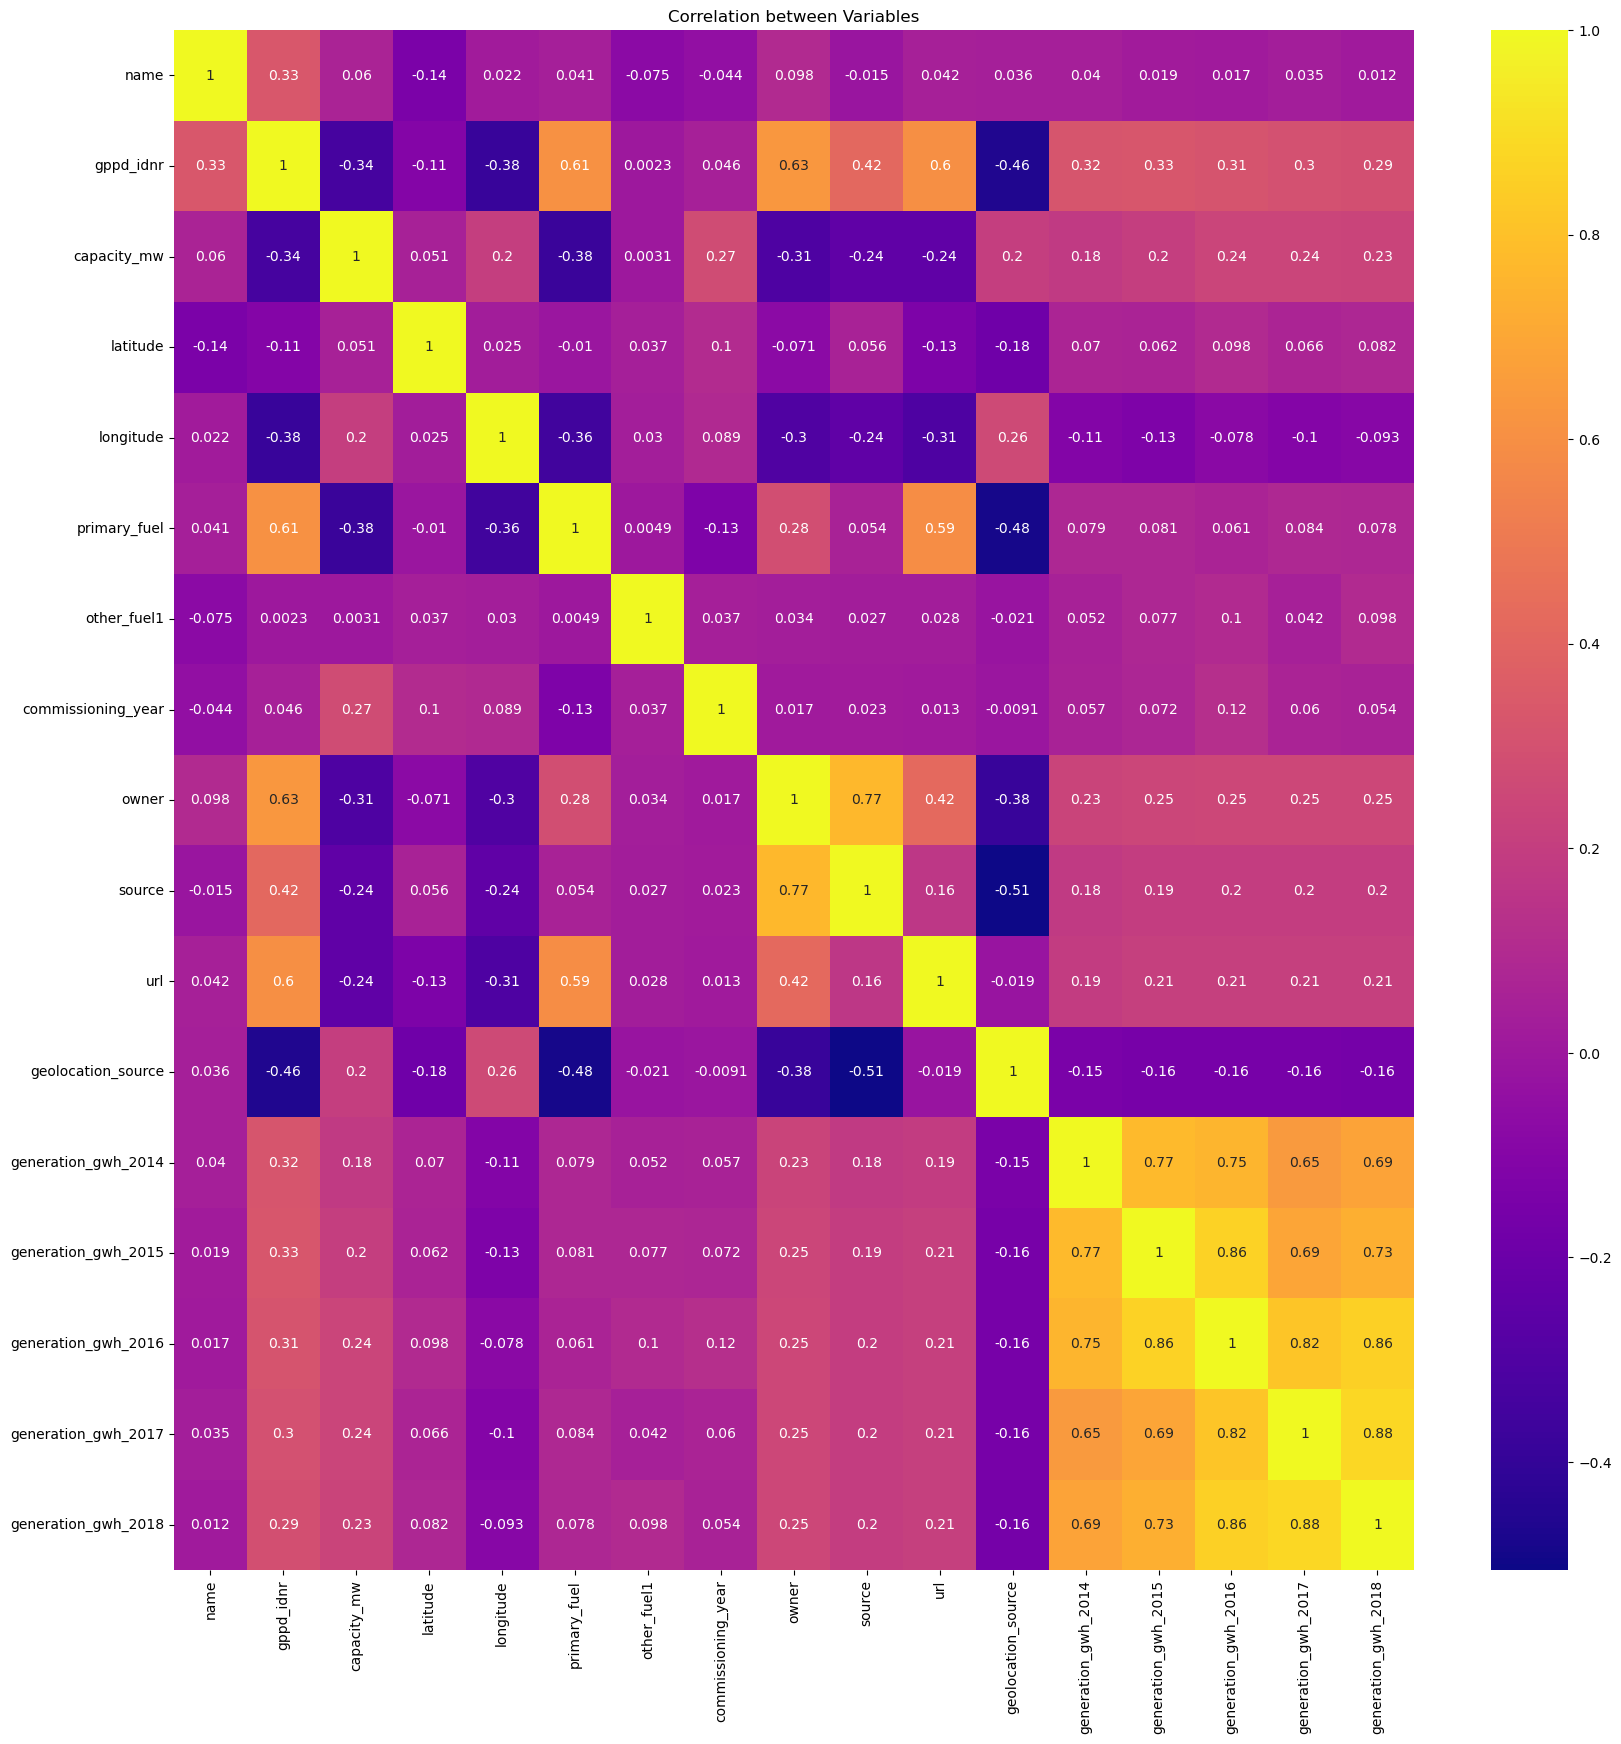

In [85]:
plt.figure(figsize=(20,20), facecolor='w')
sns.heatmap(df5.corr(), annot=True, cmap='plasma')
plt.title("Correlation between Variables")
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">In Problem Statement: Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw</span> 

In [87]:
from sklearn.multioutput import MultiOutputRegressor


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [90]:
X = df5.drop(['primary_fuel', 'capacity_mw'], axis=1)
X

,name,gppd_idnr,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.730142,0.779137,1.149805,-0.899131,0.054303,1.063775,2.095328,1.460215,0.476673,-1.083349,0.371659,0.397424,0.402492,0.400829,0.405758
1,-1.726323,0.252074,0.587311,-0.592393,0.054303,0.003260,2.446913,2.917019,1.116401,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
2,-1.722504,1.527719,0.116179,-1.797707,0.054303,0.003260,-0.656734,-0.512075,1.571318,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
3,-1.718684,-1.730142,0.439989,2.768797,0.054303,0.530965,-0.620363,-0.489662,-0.518459,0.394241,-0.411356,-0.184056,-0.154094,-0.311681,-0.324368
4,-1.714865,-1.726323,0.125479,1.056654,0.054303,1.367406,-0.620363,-0.489662,-0.518459,0.394241,0.498441,0.887538,0.906958,0.797561,0.933825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.714865,0.145133,-0.806975,0.007174,0.054303,1.443220,-0.620363,-0.489662,-0.518459,0.394241,0.371659,-3.513684,-0.877211,-0.171238,-0.277288
903,1.718684,1.409321,-1.366853,0.179610,0.054303,0.003260,0.701112,0.743019,-1.030242,-2.560940,0.371659,0.397424,0.402492,0.400829,0.405758
904,1.722504,1.672853,-0.974707,-0.377826,0.054303,0.003260,-0.620363,-0.512075,2.353208,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758
905,1.726323,0.328460,0.518793,-0.784820,0.054303,0.003260,0.422268,0.339596,-0.177271,0.394241,0.371659,0.397424,0.402492,0.400829,0.405758


In [92]:
Y = df5[['primary_fuel', 'capacity_mw']]
Y

,primary_fuel,capacity_mw
0,1.225688,-0.548908
1,-0.967877,-0.386977
2,1.664401,-0.486679
3,-0.529164,-0.324240
4,-0.967877,2.498942
...,...,...
902,-0.967877,2.159821
903,1.225688,-0.548060
904,1.664401,-0.509909
905,-0.967877,-0.417498


<span style="color:blue;font-size: 32px;font-family: verdana;font-weight: bold ">VIF <span>

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
vif['Features']=X.columns
vif

,VIF values,Features
0,1.380520,name
1,3.931642,gppd_idnr
2,1.130776,latitude
3,1.266176,longitude
4,1.032302,other_fuel1
5,1.059020,commissioning_year
6,3.754870,owner
7,3.106995,source
8,2.078109,url
9,2.012463,geolocation_source


<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">VIF < 5: Low correlation: minimal multicollinearity<span>

<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">VIF Interpretation: generation_gwh_2016 & generation_gwh_2018 High VIF, so these column should be drop: <span>

In [95]:
X=X.drop(['generation_gwh_2016','generation_gwh_2018'], axis=1)
X

,name,gppd_idnr,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,-1.730142,0.779137,1.149805,-0.899131,0.054303,1.063775,2.095328,1.460215,0.476673,-1.083349,0.371659,0.397424,0.400829
1,-1.726323,0.252074,0.587311,-0.592393,0.054303,0.003260,2.446913,2.917019,1.116401,0.394241,0.371659,0.397424,0.400829
2,-1.722504,1.527719,0.116179,-1.797707,0.054303,0.003260,-0.656734,-0.512075,1.571318,0.394241,0.371659,0.397424,0.400829
3,-1.718684,-1.730142,0.439989,2.768797,0.054303,0.530965,-0.620363,-0.489662,-0.518459,0.394241,-0.411356,-0.184056,-0.311681
4,-1.714865,-1.726323,0.125479,1.056654,0.054303,1.367406,-0.620363,-0.489662,-0.518459,0.394241,0.498441,0.887538,0.797561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.714865,0.145133,-0.806975,0.007174,0.054303,1.443220,-0.620363,-0.489662,-0.518459,0.394241,0.371659,-3.513684,-0.171238
903,1.718684,1.409321,-1.366853,0.179610,0.054303,0.003260,0.701112,0.743019,-1.030242,-2.560940,0.371659,0.397424,0.400829
904,1.722504,1.672853,-0.974707,-0.377826,0.054303,0.003260,-0.620363,-0.512075,2.353208,0.394241,0.371659,0.397424,0.400829
905,1.726323,0.328460,0.518793,-0.784820,0.054303,0.003260,0.422268,0.339596,-0.177271,0.394241,0.371659,0.397424,0.400829


In [96]:
X.shape

(907, 13)

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.73014221,  0.77913689,  1.14980517, ...,  0.37165887,
         0.39742389,  0.40082885],
       [-1.72632291,  0.2520737 ,  0.58731099, ...,  0.37165887,
         0.39742389,  0.40082885],
       [-1.72250361,  1.52771939,  0.11617932, ...,  0.37165887,
         0.39742389,  0.40082885],
       ...,
       [ 1.72250361,  1.67285273, -0.97470651, ...,  0.37165887,
         0.39742389,  0.40082885],
       [ 1.72632291,  0.32845967,  0.51879322, ...,  0.37165887,
         0.39742389,  0.40082885],
       [ 1.73014221,  1.61556326, -1.85383409, ...,  0.37165887,
         0.39742389,  0.40082885]])

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [100]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

In [101]:
X_train.shape

(634, 13)

In [102]:
X_test.shape

(273, 13)

In [103]:
Y_train.shape

(634, 2)

In [104]:
Y_test.shape

(273, 2)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [108]:
minMSE = float('inf')
#Note: This line initializes a variable named minMSE and sets its value to positive infinity (float('inf')). 
#In Python, float('inf') represents positive infinity, which is a special floating-point value representing an unbounded positive quantity.
bestRandomState = 0

for i in range(1, 75):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("VAlue of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

VAlue of MSE is  0.5476687863013004  at Random State  1
VAlue of MSE is  0.4279407248303406  at Random State  2
VAlue of MSE is  0.3753958884541809  at Random State  3
VAlue of MSE is  0.3753958884541809  at Random State  3
VAlue of MSE is  0.3753958884541809  at Random State  3
VAlue of MSE is  0.3753958884541809  at Random State  3
VAlue of MSE is  0.3753958884541809  at Random State  3
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random State  8
VAlue of MSE is  0.3745479827368099  at Random S

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Minimum MSE is  0.3374961286775057  at Random State  33</span>


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>


In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=33)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)
#mean_sq_err=mean_squared_error(pred,Y_test)
#print(mean_sq_err)

print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 0.6028666725423437
r_2 score on Training Data 0.551096853594095
Mean Absolute Error: 0.43391073225900156
Mean Square Error: 0.3374961286775057
Root Square Error: 0.5809441700176582


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">R2 score ranges from 0 to 1, where 1 indicates perfect predictions and 0 indicates that the model does not explain any variance in the target variable</span>

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Importance of R-squared (R2) Score of training data:!
The R-squared (R2) score is a measure of how well the independent variables explain the variance in the dependent variable. In the context of training data, the R2 score is important as it provides insights into how well your model fits the training data </span>


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">A high R2 score on the training data indicates that the model is able to explain a significant portion of the variability in the dependent variable using the independent variables. This suggests that the model is a good fit for the training data</span>

<span style="color:Blue;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [110]:
RFR=RandomForestRegressor()
RFR.fit(X_train, Y_train)
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.8517280393141703
r_2 score on Training Data 0.983894544556517
Mean Absolute Error: 0.1890149190762257
Mean Square Error: 0.12747380133925115
Root Square Error: 0.3570347340795446


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>

In [111]:
knn=KNN()

knn.fit(X_train, Y_train)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.7635871653838602
r_2 score on Training Data 0.8571492375012384
Mean Absolute Error: 0.24444871343024574
Mean Square Error: 0.19841891453124277
Root Square Error: 0.44544238070848485


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [119]:
gbb=GradientBoostingRegressor()
multioutput_gbb = MultiOutputRegressor(gbb)

multioutput_gbb.fit(X_train, Y_train)
multioutput_gbb.fit(X_train,Y_train)
pred_gbb=multioutput_gbb.predict(X_test)
pred_train=multioutput_gbb.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.8447207097850555
r_2 score on Training Data 0.9695950797832907
Mean Absolute Error: 0.20322136974430668
Mean Square Error: 0.1329774973868092
Root Square Error: 0.3646607977104328


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [113]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score -0.0011747573295350922
r_2 score on Training Data -1.887379141862766e-15
Mean Absolute Error: 0.743376508931449
Mean Square Error: 0.8986726349098246
Root Square Error: 0.9479834570865805


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [114]:
rd=Ridge()
rd.fit(X_train, Y_train)
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.6028534504828056
r_2 score on Training Data 0.5510925182310225
Mean Absolute Error: 0.43388743077588887
Mean Square Error: 0.33752143724230155
Root Square Error: 0.5809659518786807


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [115]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))

r_2 score 0.6887017166650976
r_2 score on Training Data 1.0
Mean Absolute Error: 0.22043475750786284
Mean Square Error: 0.2604625829679723
Root Square Error: 0.5103553497005516


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [118]:
svr_regressor = SVR()
multioutput_svr = MultiOutputRegressor(svr_regressor)
multioutput_svr.fit(X_train, Y_train)
multioutput_svr.fit(X_train,Y_train)
pred_svr=multioutput_svr.predict(X_test)
pred_train=multioutput_svr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))

r_2 score 0.8007026983265277
r_2 score on Training Data 0.8133206738987087
Mean Absolute Error: 0.2610631331443679
Mean Square Error: 0.1707550193907848
Root Square Error: 0.41322514370592794


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [117]:
etr=ExtraTreesRegressor()

etr.fit(X_train, Y_train)
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score 0.8613800558910678
r_2 score on Training Data 1.0
Mean Absolute Error: 0.18794825763186043
Mean Square Error: 0.11817714552175274
Root Square Error: 0.3437690293231092


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Interpretation: Extra Trees Regressor has high r_2 score Value  </span>

 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Linear Regression and Cross Validation Score</span>

In [124]:
score=cross_val_score(Lr, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[0.51750479 0.52946403 0.51426998 0.58502539 0.56760349]
0.5427735344895002
Difference between r_2 score and Cross Validation score is 0.06009313805284355


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Random Forest Regression and Cross Validation Score</span>

In [126]:
score1=cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[0.85505441 0.82975774 0.84508477 0.8852745  0.88793976]
0.8606222349487833
Difference between r_2 score and Cross Validation score is -0.008894195634613022


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of K Nearest Neighbor and Cross Validation Score</span>

In [127]:
score2=cross_val_score(knn, X, Y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_knn )- score2.mean())

[0.74627552 0.75415389 0.63978778 0.78777842 0.79232619]
0.7440643605187768
Difference between r_2 score and Cross Validation score is 0.0195228048650834


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Gradient Boost and Cross Validation Score</span>

In [129]:
score3=cross_val_score(multioutput_gbb, X, Y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb )- score3.mean())

[0.83469358 0.82034489 0.83547084 0.8623636  0.88003073]
0.8465807278880064
Difference between r_2 score and Cross Validation score is -0.0018600181029508889


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Lasso and Cross Validation Score</span>

In [130]:
score4=cross_val_score(lasso, X, Y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score4.mean())

[-0.01311058 -0.01654677 -0.00276321 -0.00405997 -0.023097  ]
-0.011915504286084566
Difference between r_2 score and Cross Validation score is 0.010740746956549474


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Ridge and Cross Validation Score</span>

In [132]:
score5=cross_val_score(rd, X, Y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score5.mean())

[0.51816638 0.5298088  0.51425909 0.58493956 0.56744211]
0.5429231876224803
Difference between r_2 score and Cross Validation score is -0.5440979449520154


<span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Decession Tree Regressor and Cross Validation Score</span>

In [133]:
score6=cross_val_score(dtr, X, Y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )- score6.mean())

[0.71108152 0.58450759 0.76865916 0.78099341 0.74964254]
0.718976845213931
Difference between r_2 score and Cross Validation score is -0.030275128548833408


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of SVR and Cross Validation Score</span>

In [136]:
score7=cross_val_score(multioutput_svr, X, Y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr )- score7.mean())

[0.72634978 0.77971682 0.69302804 0.82672578 0.78158255]
0.7614805958478
Difference between r_2 score and Cross Validation score is 0.039222102478727705


<span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Extra Tree Regressor and Cross Validation Score</span>

In [137]:
score8=cross_val_score(etr, X, Y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

[0.87193013 0.86780483 0.85934792 0.89200642 0.8905852 ]
0.8763348997133489
Difference between r_2 score and Cross Validation score is -0.014954843822281072


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">A negative difference between the R-squared (r2) score and the cross-validation score indicates that the model's performance during cross-validation is worse than what you would expect based on the R-squared score alone</SPAN>

<span style="color:GREEN;font-size: 22px;font-family: verdana;font-weight: bold ">R-squared (r2) Score:
The R-squared score is a measure of how well your model explains the variance in the target variable. It ranges from -∞ to 1, where 1 indicates a perfect fit, and values close to 1 suggest a good fit.</SPAN>

<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">A positive difference close to 0 indicates that the model's performance on the training data aligns well with its performance on unseen data during cross-validation.</span>

<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CONCLUSION:R-squared (r2) Score of SVR is 0.8007026983265277 and Difference between R-squared (r2) Score and CVS is 0.039222102478727705, indicate best model  </span> 

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [139]:
from sklearn.model_selection import GridSearchCV


In [144]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and Y is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

# Define the SVR model with hyperparameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__epsilon': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=MultiOutputRegressor(SVR()), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error on Test Set:", mse)


Best Parameters: {'estimator__C': 10, 'estimator__epsilon': 0.1, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
Mean Squared Error on Test Set: 0.16080734555402232


In [154]:
# Assuming X is your feature matrix and Y is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

# Define the SVR model with specific hyperparameters
svr_regressor = SVR(C=10, epsilon=0.1, gamma='auto', kernel='rbf')

# Wrap SVR in MultiOutputRegressor
multioutput_svr = MultiOutputRegressor(svr_regressor)

# Fit the model
multioutput_svr.fit(X_train, Y_train)

# Make predictions on the test set and training set
pred_svr_test = multioutput_svr.predict(X_test)
pred_svr_train = multioutput_svr.predict(X_train)
#print(pred_svr_test)
#print(pred_svr_train)

print("r_2 score", r2_score(Y_test,pred_svr_test ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr_test ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr_test))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr_test)))

r_2 score 0.810348852128544
Mean Absolute Error: 0.24891635858030334
Mean Square Error: 0.16080734555402232
Root Square Error: 0.4010079120840664


<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [155]:
import joblib
joblib.dump(multioutput_svr,'PowerPlant.pkl')

['PowerPlant.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [159]:
# Assuming X is your feature matrix and Y is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

# Define the SVR model with specific hyperparameters
svr_regressor = SVR(C=10, epsilon=0.1, gamma='auto', kernel='rbf')

# Wrap SVR in MultiOutputRegressor
multioutput_svr = MultiOutputRegressor(svr_regressor)

# Fit the model
multioutput_svr.fit(X_train, Y_train)

# Make predictions on the test set
prediction = multioutput_svr.predict(X_test)

# Flatten the prediction array to 1D
prediction_flattened = prediction.flatten()

# Convert Y_test to a 1D array using ravel()
actual_flattened = Y_test.values.ravel()

# Create a DataFrame
df_Pred = pd.DataFrame({'Predicted Values': prediction_flattened, 'Actual Values': actual_flattened})

# Display the DataFrame
print(df_Pred.head())


   Predicted Values  Actual Values
0         -0.583517      -0.967877
1          0.201798       0.159007
2         -1.168467      -0.967877
3          1.455329       2.498942
4          1.160762       1.225688


In [160]:

# Calculate Mean Squared Error
mse = mean_squared_error(df_Pred['Actual Values'], df_Pred['Predicted Values'])
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(df_Pred['Actual Values'], df_Pred['Predicted Values'])
print("R-squared:", r2)


Mean Squared Error: 0.16080734555402235
R-squared: 0.8209543715233416
